Importing libraries

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

Loading the dataset

In [7]:
from google.colab import files

In [8]:
from google.colab import drive

In [9]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
fraud_dataset=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Credit Card Fraud PredictionKNRegressor/Fraud.csv')

In [11]:
fraud_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Explore your dataset

In [12]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
fraud_dataset.shape

(6362620, 11)

In [14]:
fraud_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


Check for misisnng values

In [15]:
fraud_dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Correlation matrix

In [16]:
plt.figure(figsize=(20,7))

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

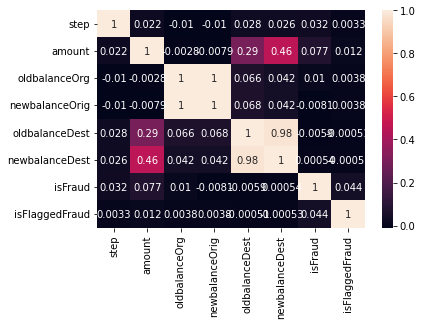

In [17]:
sns.heatmap(fraud_dataset.corr(),annot=True)

Check fraud transactions

In [18]:
fraud_dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [19]:
fraud_dataset['isFraud'].value_counts(normalize=True)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

Check transactions percentages flagged as fraud

In [20]:
fraud_dataset['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [21]:
fraud_dataset['isFlaggedFraud'].value_counts(normalize=True)*100

0    99.999749
1     0.000251
Name: isFlaggedFraud, dtype: float64

Plot transaction Vs Fraud and Tranzactions VS Flagged as False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Number of Transactions'), Text(0.5, 0, 'Type of Transction')]

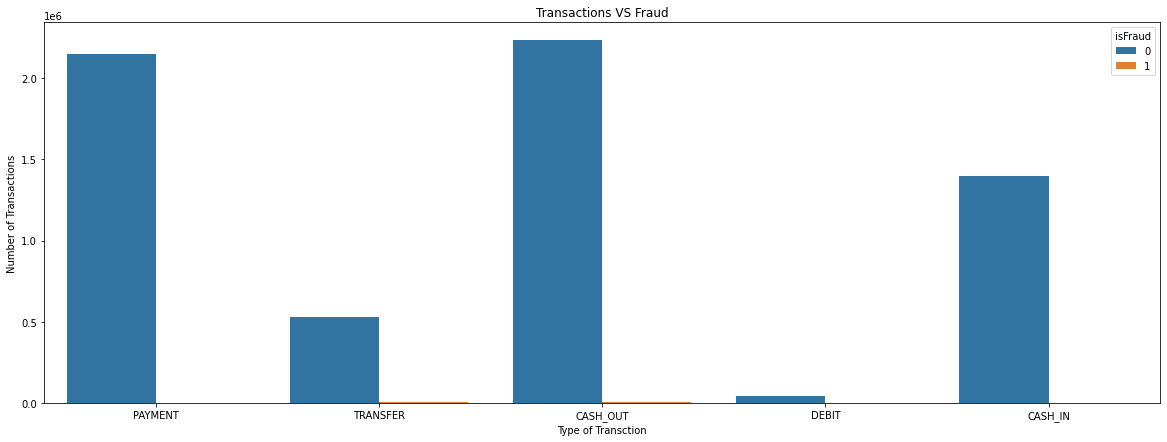

In [22]:
plt.figure(figsize=(20,7))
plt.title('Transactions VS Fraud')
g=sns.countplot(fraud_dataset['type'],hue=fraud_dataset['isFraud'])
g.set(xlabel='Type of Transction',ylabel='Number of Transactions')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Number of Transactions'), Text(0.5, 0, 'Type of Transction')]

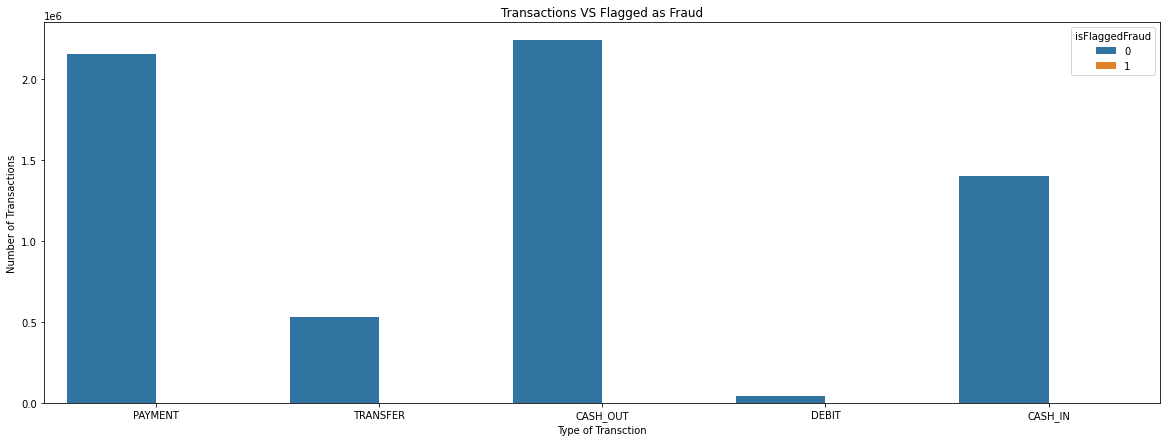

In [23]:
plt.figure(figsize=(20,7))
plt.title('Transactions VS Flagged as Fraud')
g=sns.countplot(fraud_dataset['type'],hue=fraud_dataset['isFlaggedFraud'])
g.set(xlabel='Type of Transction',ylabel='Number of Transactions')

Feature Selections technique

In [24]:
fraud_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
fraud_dataset.select_dtypes(include=['object']).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

We cand drop columns(nameOrig and nameDest)

In [26]:
fraud_dataset.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [27]:
fraud_dataset.sample(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2167431,185,CASH_OUT,144237.00,0.0,0.0,229322.01,373559.01,0,0
3299261,252,PAYMENT,10929.38,6093.0,0.0,0.00,0.00,0,0
3570690,260,TRANSFER,366853.50,0.0,0.0,1884452.62,2251306.13,0,0


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder=LabelEncoder()

In [30]:
fraud_dataset['type']=label_encoder.fit_transform(fraud_dataset['type'])

In [31]:
fraud_dataset['type'].dtype

dtype('int64')

Divide data into dependent fetaure and independent feature

In [32]:
X=fraud_dataset.iloc[:,:-1]

In [33]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [34]:
y=fraud_dataset.iloc[:,-1]

In [35]:
y

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64

Construct the model

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
neighbors=[1,3]

In [39]:
from pandas.core.common import not_none
for n in neighbors:
  knn=KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train,y_train)
  print(f"Neighbors:{n}----Train Score: {knn.score(X_train,y_train)} ----Test Score: {knn.score(X_test,y_test)}")

Neighbors:1----Train Score: 1.0 ----Test Score: 0.7142846664954787
Neighbors:3----Train Score: 0.8271601445643222 ----Test Score: 0.6825385183283097
